In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
df= pd.read_csv('NY_bike_close.csv').dropna(axis=0)
df.head()

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,tripduration,tmp,CensusTract,County_x,Borough,TotalPop,...,FamilyWork,Unemployment,Latitude,Longitude,BlockCode,County_y,State,BlockCode_11,borough_distance,distance_rank
0,6521,72.0,40.767272,-73.993929,3607,tmp,36061013500,New York,Manhattan,6384,...,0.0,5.7,40.767186,-73.995075,360610135002005,New York,NY,36061013500,0.097058,1.0
2,42233,82.0,40.711174,-74.000165,1214,tmp,36061002900,New York,Manhattan,6050,...,0.0,3.3,40.710653,-74.001407,360610029004022,New York,NY,36061002900,0.119646,1.0
3,56934,83.0,40.683826,-73.976323,1623,tmp,36047012901,Kings,Brooklyn,2577,...,0.0,5.7,40.683518,-73.976080,360470129011002,Kings,NY,36047012901,0.039960,1.0
4,78536,116.0,40.741776,-74.001497,5761,tmp,36061008300,New York,Manhattan,3929,...,0.0,11.3,40.742312,-74.001407,360610083001000,New York,NY,36061008300,0.060052,1.0
5,93334,119.0,40.696089,-73.978034,454,tmp,36047021100,Kings,Brooklyn,1362,...,0.0,9.2,40.697085,-73.979246,360470211001001,Kings,NY,36047021100,0.150738,1.0


In [3]:
df.dtypes

Unnamed: 0                   int64
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
tripduration                 int64
tmp                         object
CensusTract                  int64
County_x                    object
Borough                     object
TotalPop                     int64
Men                          int64
Women                        int64
Hispanic                   float64
White                      float64
Black                      float64
Native                     float64
Asian                      float64
Citizen                      int64
Income                     float64
IncomeErr                  float64
IncomePerCap               float64
IncomePerCapErr            float64
Poverty                    float64
ChildPoverty               float64
Professional               float64
Service                    float64
Office                     float64
Construction               float64
Production          

In [4]:
#charts: correlation heatmap,histogram number of rides vs station, station vs borough, look at coursework and follow
# along with the coursework to do on here, feature engineering, linear regression, random forest

In [5]:
df['log_tripcount']=np.log(df.tripduration)

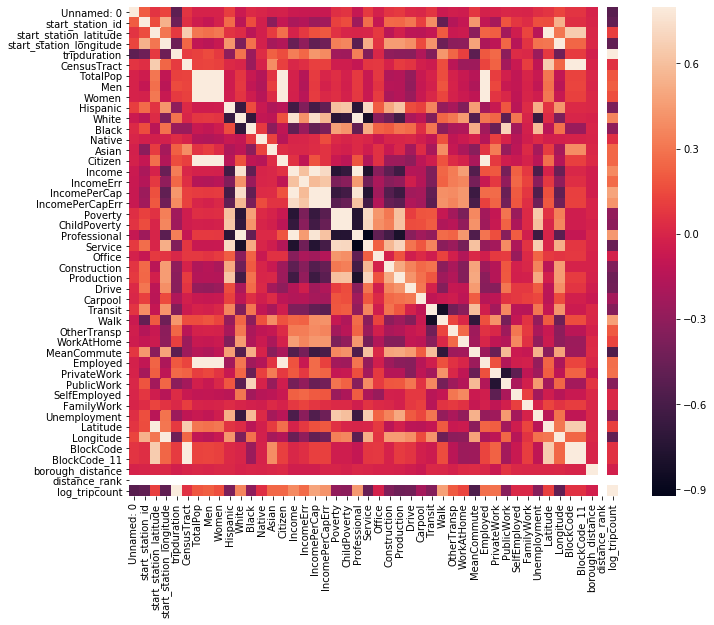

In [6]:
corrmat = df.corr()


f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [7]:
x=df[['borough_distance','TotalPop','Men','Women','Income','Poverty','start_station_id','Drive','Carpool','Walk','OtherTransp',
     'WorkAtHome','MeanCommute','Employed','Unemployment','PrivateWork','PublicWork','SelfEmployed','FamilyWork', 'tripduration']].dropna(axis=0)

y=df['tripduration'].dropna

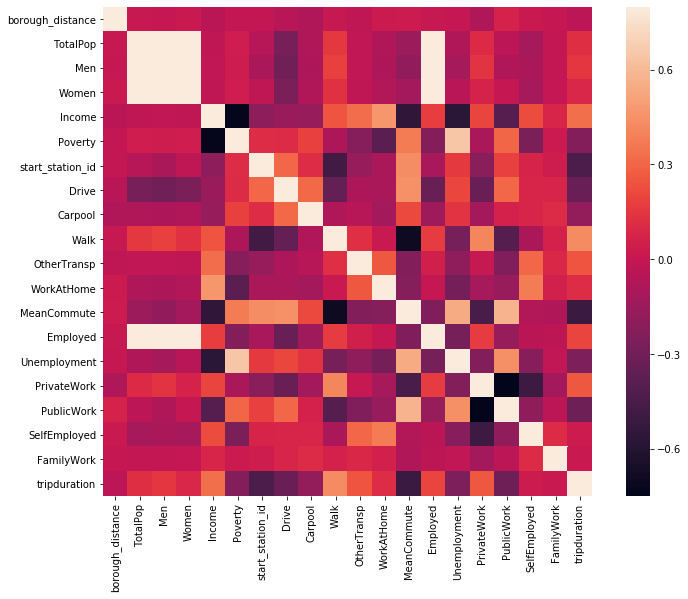

In [8]:
corrmat=x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [40]:
corr = x.corr()

In [42]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] <= 0.05:
            if columns[j]:
                columns[j] = False
selected_columns = x.columns[columns]
data = df[selected_columns]

In [48]:
selected_columns = selected_columns[:-1].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [9]:
#combine carpool+OtherTransp, keep drive, walk, drop meancommute, do percentage of men from totalpop, 

Text(0, 0.5, 'Frequency')

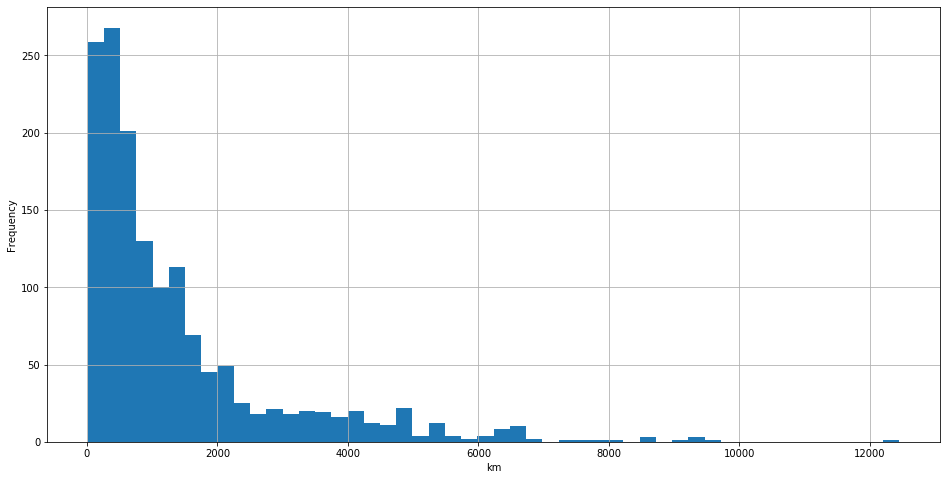

In [10]:
plt.figure(figsize=(16, 8))
df.tripduration.hist( bins=50)
plt.xlabel("km")
plt.ylabel('Frequency')

Text(0, 0.5, 'total trips')

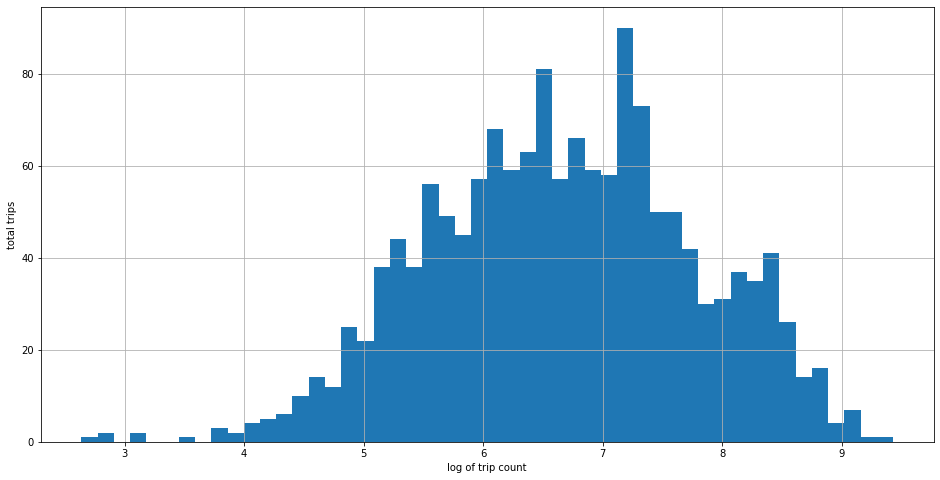

In [11]:
plt.figure(figsize=(16, 8))
df.log_tripcount.hist( bins=50)
plt.xlabel("log of trip count")
plt.ylabel('total trips')

Text(0.5, 0, 'Start Station ID')

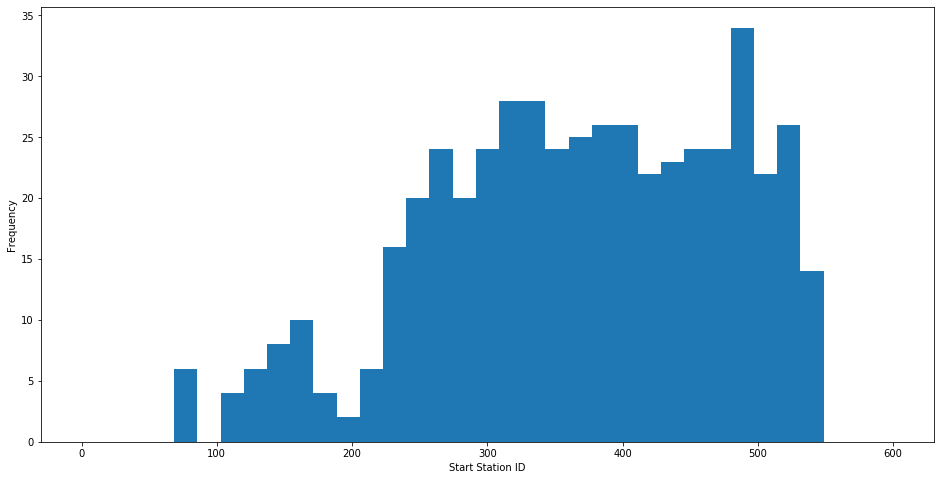

In [12]:
plt.figure(figsize=(16, 8))
df.start_station_id.plot(kind="hist", bins=35, range=(0,600))
plt.xlabel("Start Station ID")

In [13]:
#remove datapoint at 0, basic models to start- linear regressions, random forest, etc and then work on features to improve 
#prediction rate

In [14]:
#create powerpoint with shell for each slide to show what you will be predicting on that slide

In [15]:
df.columns

Index(['Unnamed: 0', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'tripduration', 'tmp', 'CensusTract',
       'County_x', 'Borough', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Citizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'Latitude', 'Longitude', 'BlockCode',
       'County_y', 'State', 'BlockCode_11', 'borough_distance',
       'distance_rank', 'log_tripcount'],
      dtype='object')

In [16]:
df_clean=df[['borough_distance','TotalPop','Men','Women','Income','Poverty','start_station_id','Drive','Carpool','Walk','OtherTransp',
     'WorkAtHome','Employed','Unemployment','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Borough','County_x','Hispanic','Black',
            'Asian','White','Office','Construction','Production','Professional','Service']].dropna (axis=1)

df_X=pd.concat([df_clean, pd.get_dummies(df_clean['Borough']),pd.get_dummies(df_clean['County_x'])],axis=1 )




In [17]:
X = pd.concat([df_clean, pd.get_dummies(df_clean['Borough']),pd.get_dummies(df_clean['County_x'])], axis=1)

Y = df['log_tripcount']

In [18]:
df_X.head()

,borough_distance,TotalPop,Men,Women,Income,Poverty,start_station_id,Drive,Carpool,Walk,...,Construction,Production,Professional,Service,Brooklyn,Manhattan,Queens,Kings,New York,Queens
0,0.097058,6384,3286,3098,62290.0,18.6,72.0,6.9,1.1,39.5,...,1.1,4.3,57.5,13.2,0,1,0,0,1,0
2,0.119646,6050,3671,2379,30629.0,20.6,82.0,2.8,4.0,43.6,...,9.9,4.1,32.3,30.4,0,1,0,0,1,0
3,0.039960,2577,1102,1475,82071.0,11.2,83.0,1.2,0.0,8.7,...,0.0,0.7,61.5,17.5,1,0,0,1,0,0
4,0.060052,3929,1534,2395,69303.0,18.5,116.0,2.0,0.8,17.0,...,0.9,0.7,56.8,10.4,0,1,0,0,1,0
5,0.150738,1362,684,678,43000.0,18.7,119.0,25.8,2.3,4.7,...,3.8,11.5,44.3,22.7,1,0,0,1,0,0


In [19]:
Y.head()
X.head()

,borough_distance,TotalPop,Men,Women,Income,Poverty,start_station_id,Drive,Carpool,Walk,...,Construction,Production,Professional,Service,Brooklyn,Manhattan,Queens,Kings,New York,Queens
0,0.097058,6384,3286,3098,62290.0,18.6,72.0,6.9,1.1,39.5,...,1.1,4.3,57.5,13.2,0,1,0,0,1,0
2,0.119646,6050,3671,2379,30629.0,20.6,82.0,2.8,4.0,43.6,...,9.9,4.1,32.3,30.4,0,1,0,0,1,0
3,0.039960,2577,1102,1475,82071.0,11.2,83.0,1.2,0.0,8.7,...,0.0,0.7,61.5,17.5,1,0,0,1,0,0
4,0.060052,3929,1534,2395,69303.0,18.5,116.0,2.0,0.8,17.0,...,0.9,0.7,56.8,10.4,0,1,0,0,1,0
5,0.150738,1362,684,678,43000.0,18.7,119.0,25.8,2.3,4.7,...,3.8,11.5,44.3,22.7,1,0,0,1,0,0


In [20]:
y=df.log_tripcount
X= df_X.drop ('Borough', 1).drop('County_x' , 1)
(X_train, X_test, y_train, y_test)=train_test_split(X,y,test_size=0.25)
lr=LinearRegression()

In [21]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr.score(X_test,y_pred)
mean_squared_error(y_test,y_pred)

0.689326369427993

R-squared regression: 0.4910456463578624
R-squared PLSR: 0.48806498687104904


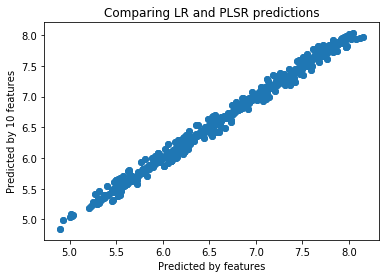

In [22]:
from sklearn.cross_decomposition import PLSRegression

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


pls1 = PLSRegression(n_components=10)


pls1.fit(X, y)


Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))


plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by features')
plt.ylabel('Predicted by 10 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression



In [23]:
regr1 = linear_model.LinearRegression()
Y_train = df['log_tripcount']
X_train = df_X.drop ('Borough', 1).drop('County_x' , 1)

regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))


R-squared simple model:
0.4910456463578624


In [92]:
df_X.head()

,borough_distance,TotalPop,Men,Women,Income,Poverty,start_station_id,Drive,Carpool,Walk,...,Production,Professional,Service,log_tripcount,Brooklyn,Manhattan,Queens,Kings,New York,Queens
0,0.097058,6384,3286,3098,62290.0,18.6,72.0,6.9,1.1,39.5,...,4.3,57.5,13.2,8.190632,0,1,0,0,1,0
2,0.119646,6050,3671,2379,30629.0,20.6,82.0,2.8,4.0,43.6,...,4.1,32.3,30.4,7.101676,0,1,0,0,1,0
3,0.039960,2577,1102,1475,82071.0,11.2,83.0,1.2,0.0,8.7,...,0.7,61.5,17.5,7.392032,1,0,0,1,0,0
4,0.060052,3929,1534,2395,69303.0,18.5,116.0,2.0,0.8,17.0,...,0.7,56.8,10.4,8.658866,0,1,0,0,1,0
5,0.150738,1362,684,678,43000.0,18.7,119.0,25.8,2.3,4.7,...,11.5,44.3,22.7,6.118097,1,0,0,1,0,0


In [93]:
df_X.columns

Index(['borough_distance', 'TotalPop', 'Men', 'Women', 'Income', 'Poverty',
       'start_station_id', 'Drive', 'Carpool', 'Walk', 'OtherTransp',
       'WorkAtHome', 'Employed', 'Unemployment', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Borough', 'County_x', 'Hispanic',
       'Black', 'Asian', 'White', 'Office', 'Construction', 'Production',
       'Professional', 'Service', 'log_tripcount', 'Brooklyn', 'Manhattan',
       'Queens', 'Kings', 'New York', 'Queens'],
      dtype='object')

In [25]:
from sklearn import ensemble
regr = ensemble.RandomForestRegressor()
X = df_X.drop ('Borough', 1).drop('County_x' , 1)
Y = df['log_tripcount']
regr.fit(X, Y)

print(regr.feature_importances_)

[6.63506746e-02 6.95948015e-03 1.00948932e-02 8.78675021e-03
 1.85752189e-02 2.29526103e-02 1.56675709e-01 2.48172790e-02
 1.13159547e-02 2.54585288e-01 2.02159211e-02 1.64867911e-02
 9.96969543e-03 1.12424252e-02 2.06491999e-02 2.22938155e-02
 8.60557631e-03 5.10820839e-03 1.05307173e-02 2.50500042e-02
 1.89391096e-02 1.18572515e-02 1.41083055e-02 7.85630388e-03
 2.36893642e-02 5.21912306e-02 5.53497544e-02 2.75729077e-03
 3.73552990e-02 1.27093335e-03 7.24293699e-03 3.59271459e-02
 1.88862201e-04]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
y=df.log_tripcount
X_feat=df_X.drop ('Borough', 1).drop('County_x' , 1)

X_feat['male_usage']= X.Men / X.TotalPop *100
X_feat['shared_trans'] = X.Carpool + X.Walk + X.OtherTransp
X_feat['minority'] = X.Hispanic + X.Black + X.Asian
X_feat['corporate'] = X.Office +X.Construction + X.PublicWork + X.Production
(X_train, X_test, y_train, y_test)=train_test_split(X_feat,y,test_size=0.25)
lr=LinearRegression()


In [27]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr.score(X_test,y_pred)
mean_squared_error(y_test,y_pred)

0.6752747332714665

R-squared regression: 0.4910456463578624
R-squared PLSR: 0.48806498687104904


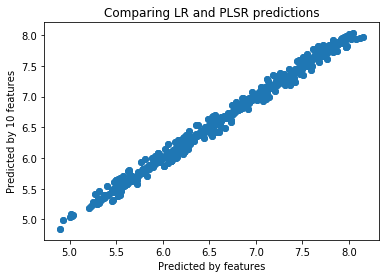

In [28]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


pls1 = PLSRegression(n_components=10)


pls1.fit(X, y)


Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))


plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by features')
plt.ylabel('Predicted by 10 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [99]:
#random forest regression...whered it go?, gradient boosting, SVM,KNN maybe
#gradient boost, random forest regression grid search and fine tune

In [100]:
# use demographics to determine next best spot to add a station, in the .predict(use a census dataframe that doesn't have a
#station information is not included)this way you find a spot in boroughs that need one. 

In [29]:
y_gb = df['log_tripcount'] - 1
X_gb = df_X.loc[:,:]

# Make the categorical variable 'country' into dummies.
X_gb = df_X.drop ('Borough', 1).drop('County_x' , 1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X_gb[:offset], y_gb[:offset]

# And put 10% in the test set.
X_test, y_test = X_gb[offset:], y_gb[offset:]

In [30]:
params = {'n_estimators': 500,
          'max_depth': 2}


clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 1.1489


In [31]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train, y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

R2 sq:  0.6748469100193764
Mean squared error: 1.01
Test Variance score: -0.16


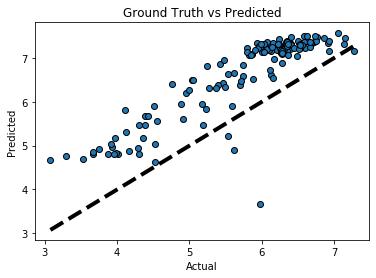

In [33]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

Text(0, 0.5, 'Deviance')

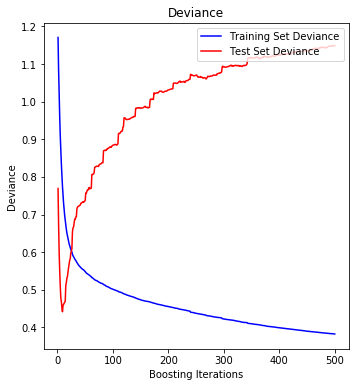

In [34]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

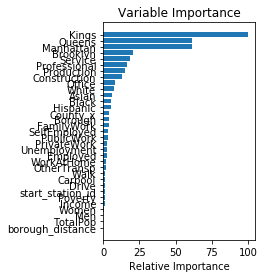

In [35]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,df_X)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()